In [83]:
import pandas as pd

df = pd.read_csv("toluca.csv")

df

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


In [84]:
df.describe()

,lotSize,workHours
count,25.000000,25.000000
mean,70.000000,312.280000
std,28.722813,113.137645
min,20.000000,113.000000
25%,50.000000,224.000000
50%,70.000000,342.000000
75%,90.000000,389.000000
max,120.000000,546.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
lotSize      25 non-null int64
workHours    25 non-null int64
dtypes: int64(2)
memory usage: 528.0 bytes


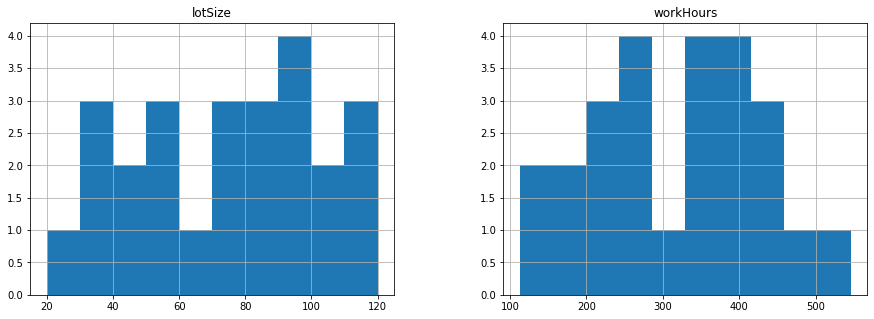

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(15,5))
plt.show()

#most of the lotSize is 90 to 100


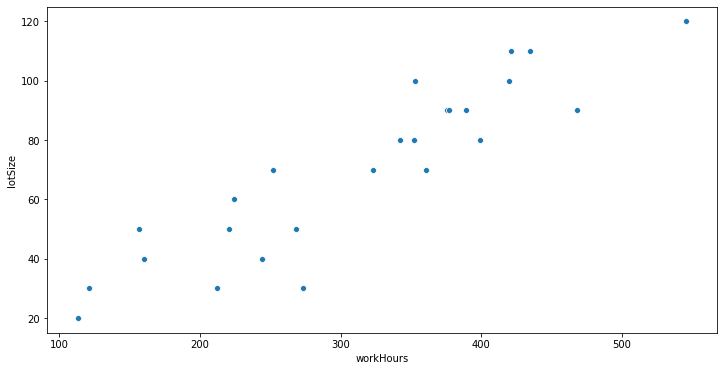

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(12,6))
ax = sns.scatterplot(x = df['workHours'], y = df['lotSize'], data=df)

plt.show()

[Text(0, 0.5, 'Lot Size'), Text(0.5, 0, 'Work Hours')]

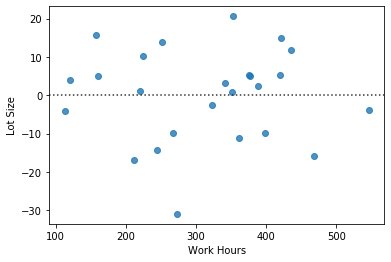

In [88]:
import seaborn as sns

r1 = sns.residplot("workHours", "lotSize", data=df)

r1.set(xlabel = 'Work Hours', ylabel = 'Lot Size')


#### From the residual plot, we can see that the variance is almost the same. Thus, workHours can be a predictor for lotSize in SLR.

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#X = df["workHours"].values.reshape(-1,1)

#Y = df["lotSize"].values.reshape(-1,1)

#reg.fit(X,Y)


reg.fit(df.drop("lotSize", axis=1), df.iloc[:,0])

reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
reg.coef_

array([0.2301084])

In [91]:
reg.intercept_

-1.8582511423063721

In [94]:
reg.score(df.drop("lotSize", axis=1), df.iloc[:,0])

0.8215334744346305

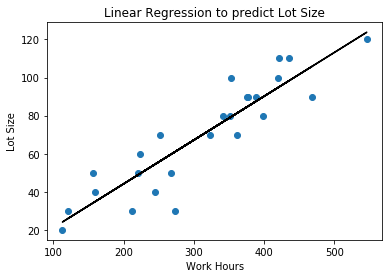

In [92]:
hypothesis = reg.predict(df.drop("lotSize", axis=1))
plt.scatter(df.drop("lotSize", axis=1), df.iloc[:,0])
plt.plot(df.drop("lotSize", axis=1), hypothesis, color="black")
plt.title("Linear Regression to predict Lot Size")
plt.xlabel("Work Hours")
plt.ylabel("Lot Size")
plt.show()

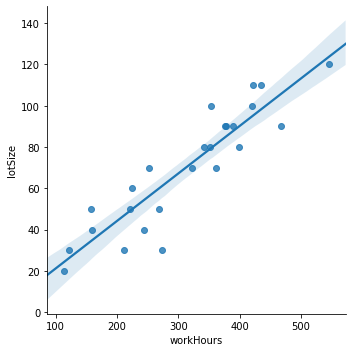

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x='workHours',y='lotSize', data = df)

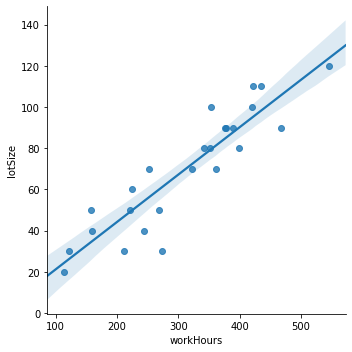

In [108]:
#General stategy
#1. Plot the data
#2. look at F-statistic p-value
#3. R**2
#4. Estimated coefficients and their p values
#5. Examine X for homoscedasticity(sp?) using BF test

#1. Plot the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(y='lotSize', x="workHours", data = df)


In [110]:
#2. Look at the F statistic and p-value
import statsmodels.formula.api as smf
#oridinary least square - essentially linear regression
tolucaOLSmodel = smf.ols('lotSize ~ workHours' , df).fit()
print('Fvalue', tolucaOLSmodel.fvalue, '\nPvalue:', tolucaOLSmodel.f_pvalue)
#high F value to mean that the two variables are highly correlated
#the p value should be low as possible
#F value - the degree to which y is affected by x

Fvalue 105.87570891593045 
Pvalue: 4.4488275871889437e-10


In [111]:
#3 R*R
tolucaOLSmodel.rsquared #explaining the variance - 82% is good

0.8215334744346307

In [112]:
#4 Estimated coefficients and p-value
# Slope and intercept
tolucaOLSmodel.params

Intercept   -1.858251
workHours    0.230108
dtype: float64

In [113]:
tolucaOLSmodel.pvalues #pvalue is less than 0.05

Intercept    8.042276e-01
workHours    4.448828e-10
dtype: float64

In [117]:
#5. BF Test 
import scipy as sp

sample_1 = tolucaOLSmodel.resid[1:round(len(tolucaOLSmodel.resid)/2)]
sample_2 = tolucaOLSmodel.resid[round(len(tolucaOLSmodel.resid)/2)+1 : ]
sp.stats.levene(sample_1, sample_2, center='median') 


LeveneResult(statistic=2.0335158362617762, pvalue=0.16856144725573532)

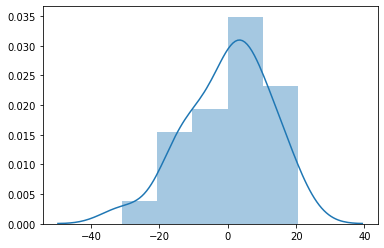

In [118]:
sns.distplot(tolucaOLSmodel.resid)

In [116]:
sp.stats.shapiro(tolucaOLSmodel.resid)[1]

0.5667905211448669

In [95]:
#Train and Test Data Split
# Let's split into train & test. This will allow us to train a model
# (on the "train" material) and give us an idea of how each model 
# will perform on unseen data ("test" material).

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [96]:
train_set, test_set = split_train_test(df,0.2)

print(len(train_set), "train +",len(test_set),"test")

20 train + 5 test


In [97]:
train_labels = train_set.lotSize
test_labels = test_set.lotSize

test_labels #indices and the labels

11     70
1      30
14    110
22     40
2      50
Name: lotSize, dtype: int64

In [98]:
train_features = train_set.drop(columns = ['lotSize'])
test_features = test_set.drop(columns = ['lotSize'])
train_features.head()

,workHours
21,468
10,160
0,399
20,273
7,352


In [99]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
lin_reg.coef_

array([0.22803344])

In [120]:
lin_reg.intercept_

-1.998524502040766

In [103]:
lin_reg.score(train_features, train_labels) #prediction score

0.8044659079874177

In [100]:
# Now that we have a (trained) model, let's predict how well it performs on the test set
# We'll evaluate the performance with a typical metric: root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

hypothesis = lin_reg.predict(test_features)
mse = mean_squared_error(test_labels, hypothesis)
print("RMSE:", np.sqrt(mse))

RMSE: 10.800584753073194


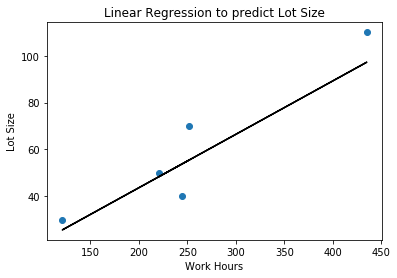

In [106]:
#For the test data:
Y_pred = lin_reg.predict(test_features)
plt.scatter(test_features, test_labels)
plt.plot(test_features, Y_pred, color="black")
plt.title("Linear Regression to predict Lot Size")
plt.xlabel("Work Hours")
plt.ylabel("Lot Size")
plt.show()

#### Thus, workHours can be a good predictor for lotSize using SLR